# **Практическое занятие 7: основы визуализации**

## **План занятия**

- Обсуждение плана занятия
- Повторение лекции
- Самостоятельная работа + вопросы

Сразу импортируем то, что нам понадобится:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка и сохранение данных в `numpy`

`np.loadtxt` загружает данные из файла, пример использования:

In [2]:
co2 = np.loadtxt('data/co2-ice-cores-epica-c.txt')
co2

array([[1.37000e+02, 2.80400e+02],
       [2.68000e+02, 2.74900e+02],
       [2.79000e+02, 2.77900e+02],
       ...,
       [7.96467e+05, 1.89300e+02],
       [7.97099e+05, 1.88400e+02],
       [7.98512e+05, 1.91000e+02]])

Полезные вещи:
- Аргумент `skiprows=` позволяет пропускать строчки в начале файла
- `encoding='utf8'` позволяет считывать файлы в заданной кодировке (обычно не очень актуально)
- `delimeter=` позволяет считывать данные, которые разделены чем-то кроме пробелов (например запятыми)
- `unpack=True` позволяет записывать данные в переменные, равные количеству столбцов в данных. Пример:

In [5]:
time_kyr, co2_ppm = np.loadtxt('data/co2-ice-cores-epica-c.txt', unpack=True)
time_kyr, co2_ppm

(array([1.37000e+02, 2.68000e+02, 2.79000e+02, ..., 7.96467e+05,
        7.97099e+05, 7.98512e+05]),
 array([280.4, 274.9, 277.9, ..., 189.3, 188.4, 191. ]))

Сохранение данных, пример:

In [6]:
np.savetxt('data/co2-ice-cores-epica-c-copy.txt', co2)

Полезные фичи:
- `delimeter=` позволяет записывать данные с другим разделителем (не пробелом)
- `header=` позволяет записать в начало файла строчку с комментарием (например, названия столбцов)

# Визуализация и `matplotlib`

## Основные инструменты

- `plt.figure()`: создает фигуру
    - аргумент `figsize=`: аргумент, который позволяет задавать размер фигуры
- `plt.plot(x, y)`: рисует график `y` от `x` сплошной непрерывной линией
    - аргумент `color=`: можно указать цвет графика. Рекомендуется использовать [стандартную палитру](https://matplotlib.org/stable/users/prev_whats_new/dflt_style_changes.html). Если нужен конкретный цвет, например, черный, то можно написать `color='black'` или через `rgb`, например `color=(0.1, 0.2, 0.5)`. Подробнее можно почитать [здесь](https://matplotlib.org/stable/users/explain/colors/colors.html)
    - аргумент `lw=`: задает ширину линии, например `lw=2`
    - аргумент `marker=`: позволяет строить график не линией, а символами, например, точками и звездочками. Список маркеров можно посмотреть [здесь](https://matplotlib.org/stable/api/markers_api.html)
    - аргумент `alpha=` задает прозрачность графика. 0 - полностью прозрачно, 1 - полностью непрозрачно
- `plt.xlabel('Подпись оси x')`, `plt.xlabel('Подпись оси y')`: позволяет подписывать оси `x` и `y`
    - аргумент `fontsize=` позволяет изменять размер шрифта
    - во всех подписях можно использовать `latex`. Например: `$x_2^3$`
- `plt.title('Подпись графика (тайтл)')`: позволяет подписать график сверху
    - аргумент `fontsize=` позволяет изменять размер шрифта
- `plt.legend(['Подпись 1', 'Подпись 2'])`: позволяет подписть легенду к нескольким графикам
    - аргумент `fontsize=` позволяет изменять размер шрифта
    - аргумент `ncols=` позволяет построить легенду в несколько колонок
- `plt.xlim([x_start, x_end])`, `plt.ylim([y_start, y_end])`: позволяет ограничить оси `x` и `y`
- `plt.gca().tick_params(labelsize=)`: позволяет указать размер цифр по осям графика
- `plt.grid()`: добавляет на график сетку

Другие функции и полезные приколы можно найти [здесь](https://matplotlib.org/cheatsheets/).

### Шаблон рисования обычного графика

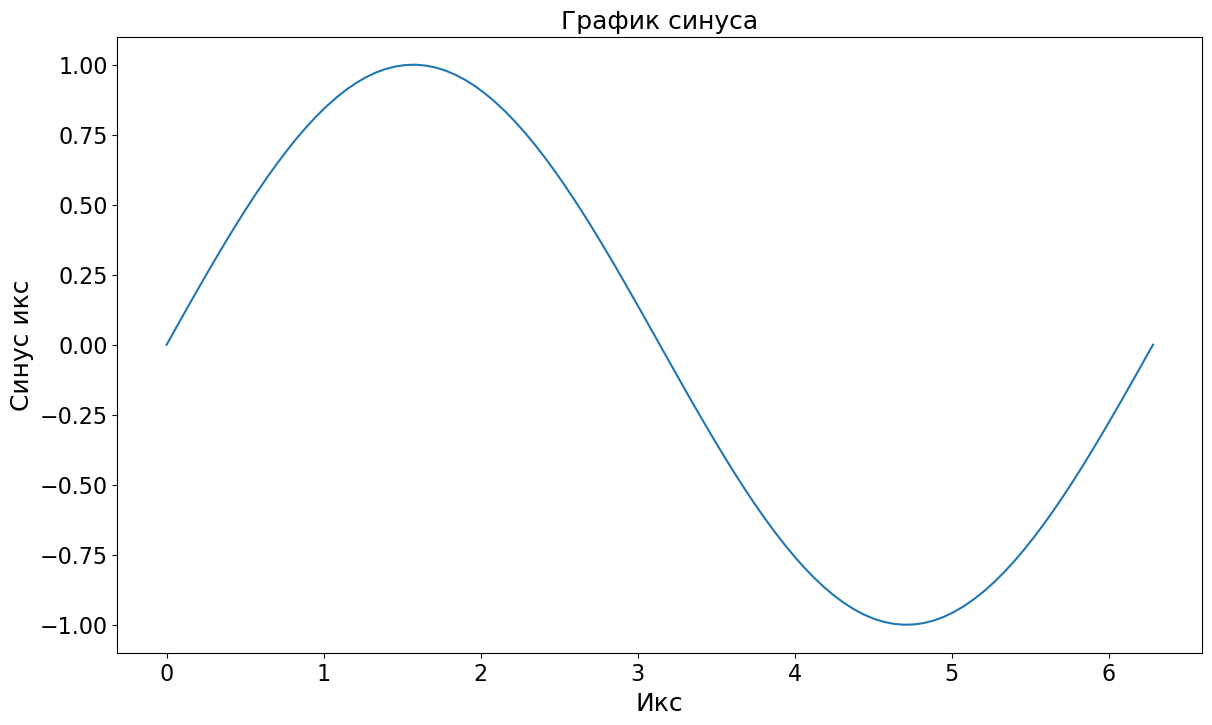

In [191]:
x = np.linspace(0, 2*np.pi, 100) 
y = np.sin(x) # считаем данные

plt.figure(figsize=(14,8)) # задаем фигуру опредленного размера

plt.plot(x, y) # рисуем график
plt.xlabel('Икс', fontsize=18) # подписываем ось x
plt.ylabel('Синус икс', fontsize=18) # подписываем ось y
plt.title('График синуса', fontsize=18) # подписываем график 

ax=plt.gca()
ax.tick_params(labelsize=16) # увеличиваем размер цифр по осям

### Шаблон рисования нескольких графиков на одной фигуре

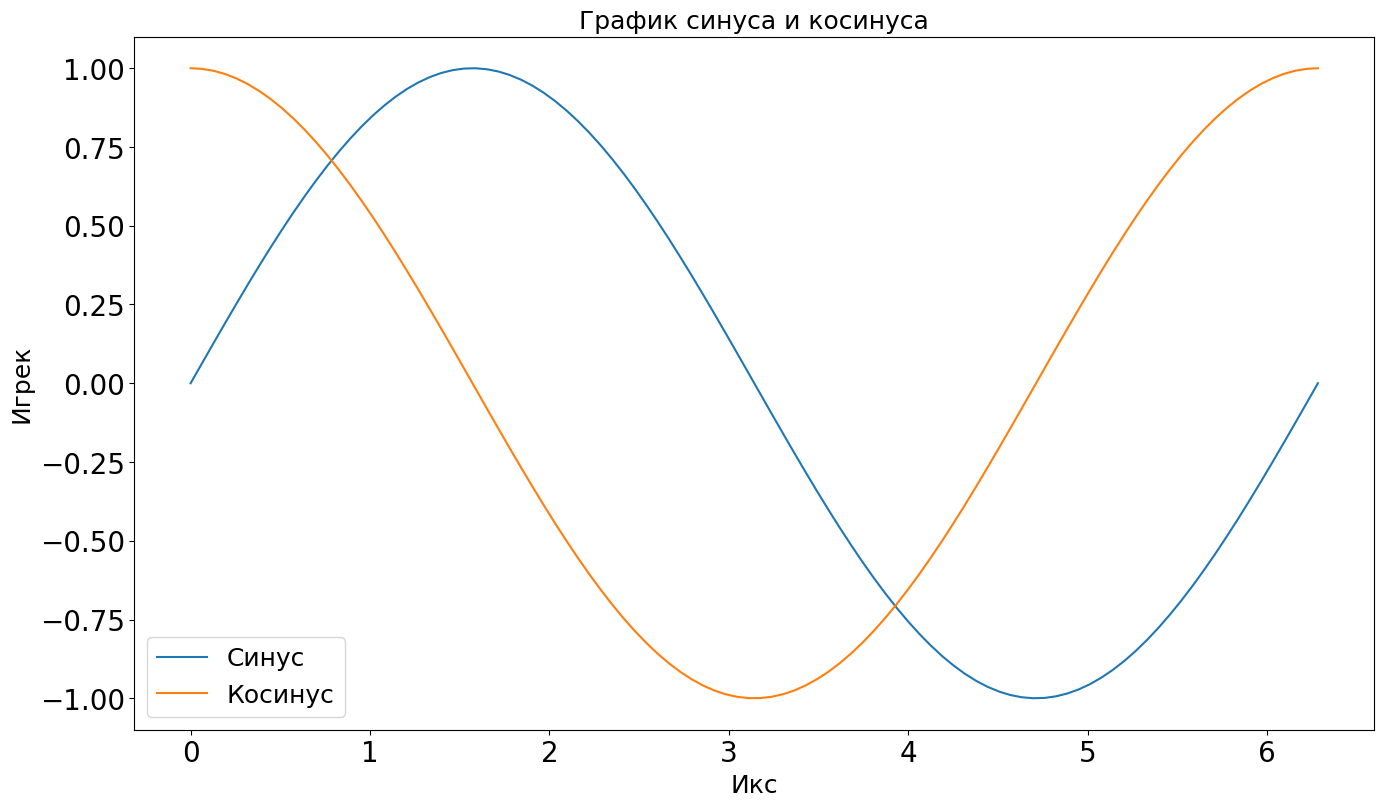

In [190]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x) # считаем данные
y2 = np.cos(x) # считаем данные

plt.figure(figsize=(16,9))
plt.plot(x, y1) # рисуем синус
plt.plot(x, y2) # рисуем косинус
# здесь может быть много plot-ов, даже цикл с plot-ами

plt.xlabel('Икс', fontsize=18)
plt.ylabel('Игрек', fontsize=18)
plt.title('График синуса и косинуса', fontsize=18) 
plt.legend(['Синус', 'Косинус'], fontsize=18) # подпись легенды к каждому графику
plt.gca().tick_params(labelsize=20)

### Шаблон рисования сабплотов

Две панели:

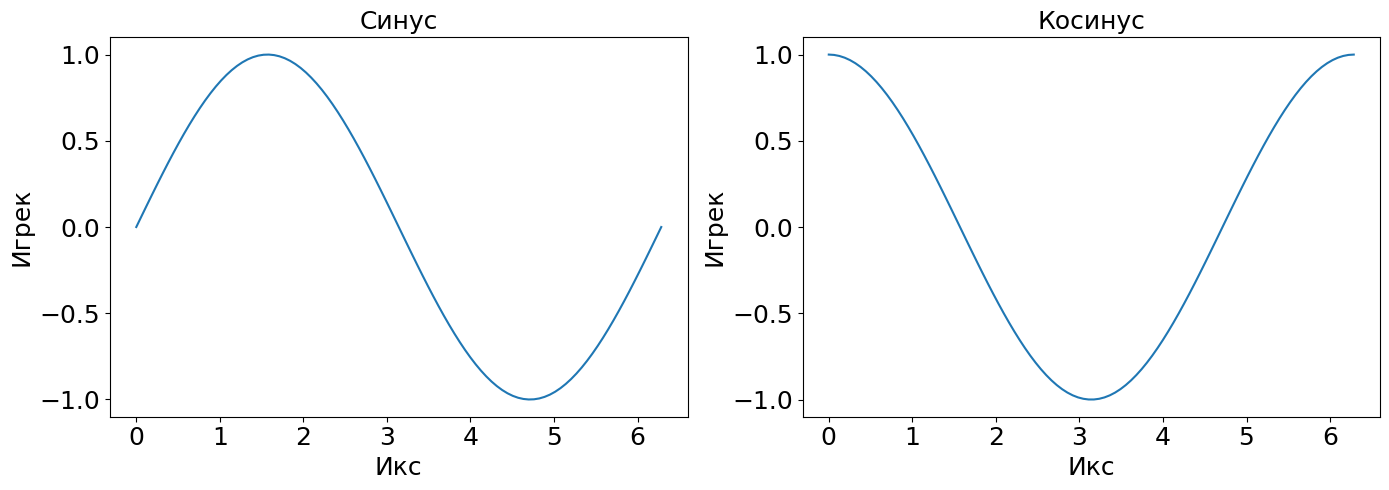

In [18]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(1, 2, figsize=(14,5)) 
ax[0].plot(x, y1)
ax[0].set_title('Синус', fontsize=18)

ax[1].plot(x, y2)
ax[1].set_title('Косинус', fontsize=18)

for i in range(2):
    ax[i].set_xlabel('Икс', fontsize=18) # обратите внимание: не xlabel 
    ax[i].set_ylabel('Игрек', fontsize=18)
    ax[i].tick_params(labelsize=18)
    
plt.tight_layout() # добавили магическую строчку

Четыре панели:

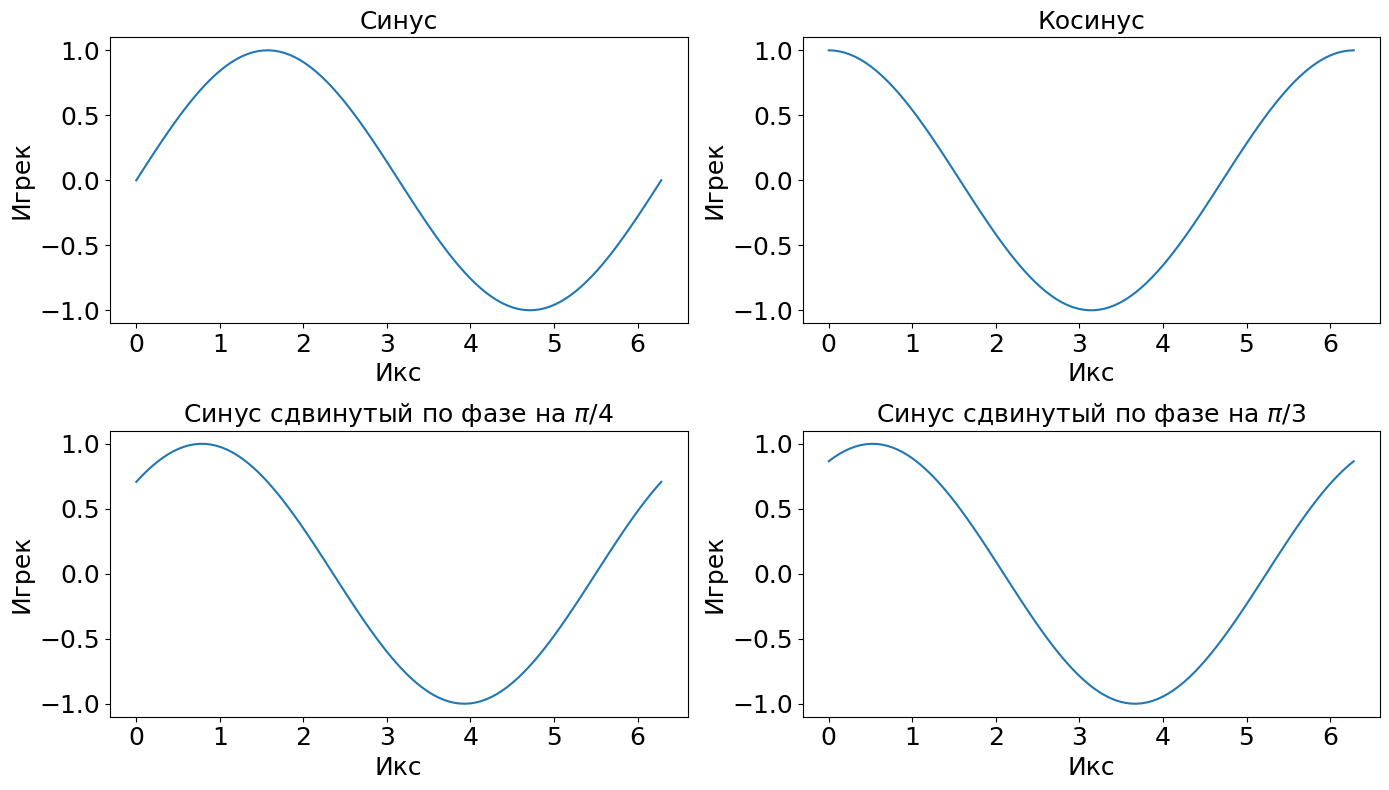

In [31]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x+np.pi/4)
y4 = np.sin(x+np.pi/3)

fig, ax = plt.subplots(2, 2, figsize=(14,8)) 
ax[0, 0].plot(x, y1)
ax[0, 0].set_title('Синус', fontsize=18)

ax[0, 1].plot(x, y2)
ax[0, 1].set_title('Косинус', fontsize=18)

ax[1, 0].plot(x, y3)
ax[1, 0].set_title('Синус сдвинутый по фазе на $\pi$/4', fontsize=18)

ax[1, 1].plot(x, y4)
ax[1, 1].set_title('Синус сдвинутый по фазе на $\pi$/3', fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i, j].set_xlabel('Икс', fontsize=18) # обратите внимание: не xlabel 
        ax[i, j].set_ylabel('Игрек', fontsize=18)
        ax[i, j].tick_params(labelsize=18)
    
plt.tight_layout() # добавили магическую строчку

# Сохранение графиков

- `plt.savefig('path/to/file.png')` сохраняет текущую фигуру в формате указанном в конце пути
    - аргумент `dpi=300` позволяет сохранять графики в более-менее хорошем качестве
    - стоит проверить, ничего ли не слетает в процессе; если что-то слетает попробовать починить с помощью `plt.tight_layout()`
    - стоит сохранять копию картинки в векторе (`.eps`) 
    
Пример:

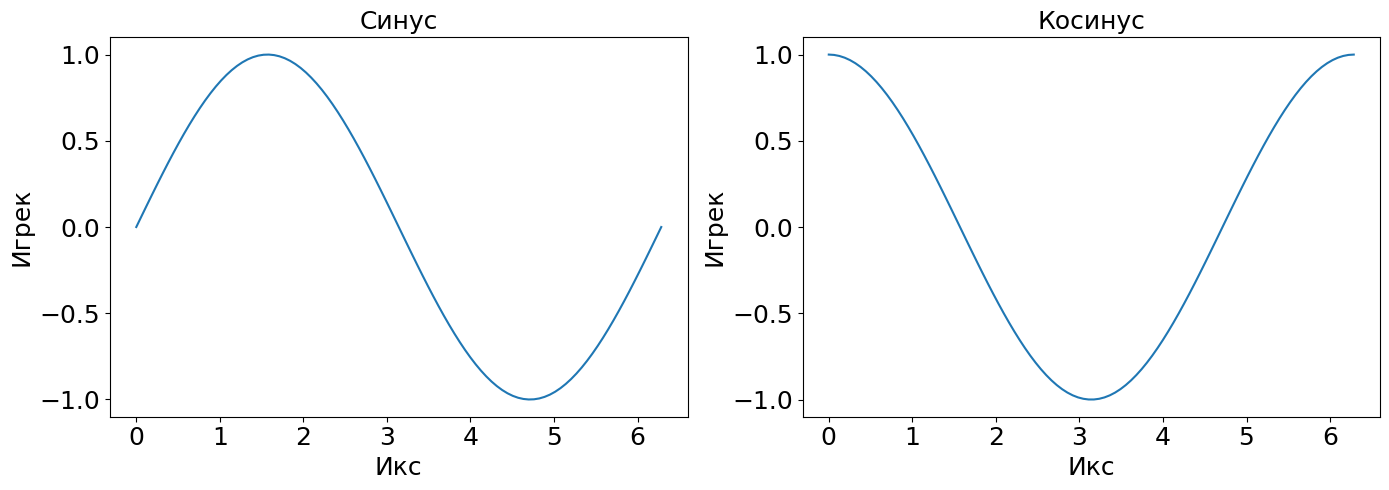

In [35]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(1, 2, figsize=(14,5)) 
ax[0].plot(x, y1)
ax[0].set_title('Синус', fontsize=18)

ax[1].plot(x, y2)
ax[1].set_title('Косинус', fontsize=18)

for i in range(2):
    ax[i].set_xlabel('Икс', fontsize=18) 
    ax[i].set_ylabel('Игрек', fontsize=18)
    ax[i].tick_params(labelsize=18)
    
plt.tight_layout() 

plt.savefig('figures/example1.png', dpi=300)
plt.savefig('figures/example1.eps')

# Семинарские задания и домашние задания (0.8 балла)

## Ой а чего это за ошибка

✅ (**0.05 балла**) Найдите и исправьте ошибку:

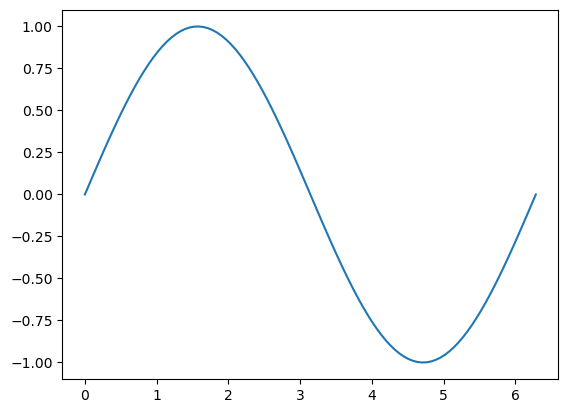

In [4]:
x = np.linspace(0, 2*np.pi, 100) # здесь все правильно
y = np.sin(x) # здесь тоже

plt.plot(x, y)

✅ (**0.1 балла**) Найдите и исправьте ошибку:

Text(0.5, 1.0, 'График синуса и косинуса')

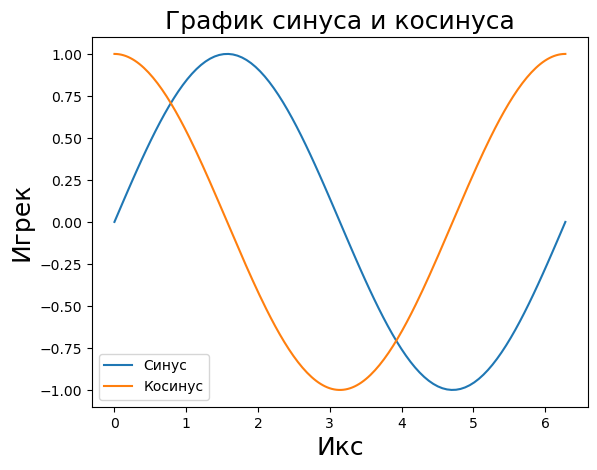

In [7]:
x1 = np.linspace(0, 2*np.pi, 100)
x2 = np.linspace(0, 2*np.pi, 200)
y1 = np.sin(x1)
y2 = np.cos(x2)

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.xlabel('Икс', fontsize=18)
plt.ylabel('Игрек', fontsize=18)
plt.legend(['Синус', 'Косинус'], fontsize=10)
plt.title('График синуса и косинуса', fontsize=18)

Ваш научный руководитель отправил вам код с картинкой которую он строил, когда был студентом пятого курса в 2008-ом году. Вы понимаете, что если вы придете на конференцию с этой картинкой, то будет не очень. Поправьте:
- ✅ (**0.025 балла**) Размер шрифта подписей
- ✅ (**0.025 балла**) Цвет графика на вменяемый
- ✅ (**0.025 балла**) Размер фигуры
- ✅ (**0.025 балла**) Размер цифр по осям

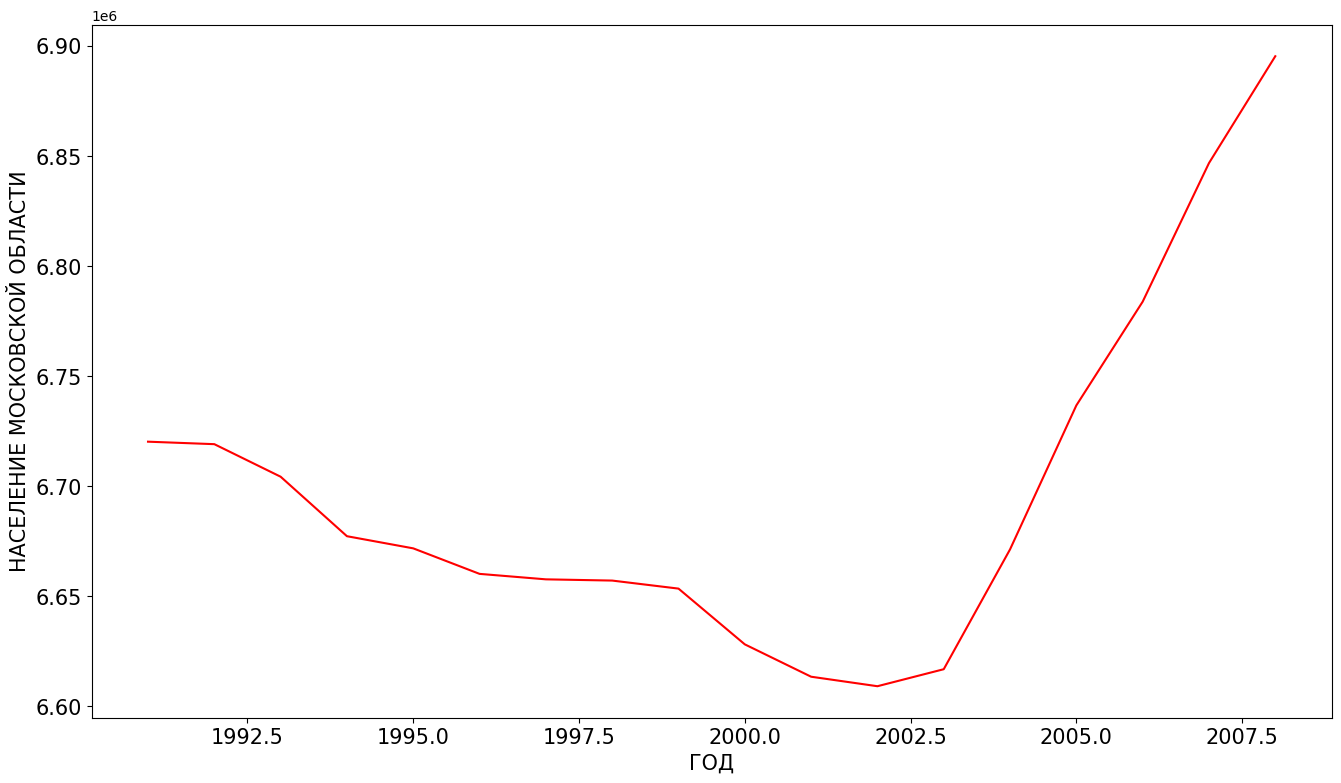

In [21]:
year, population_mo = np.loadtxt('data/data.txt', unpack=True)

plt.figure(figsize=(16,9))
plt.plot(year, population_mo, color='red')
plt.xlabel('ГОД', fontsize=15)
plt.ylabel('НАСЕЛЕНИЕ МОСКОВСКОЙ ОБЛАСТИ', fontsize=15)
plt.gca().tick_params(labelsize=15)

## CO$_2$ в ледяных кернах

В файле `data/co2-ice-cores-epica-c.txt` находится содержание CO$_2$ (в частях на миллион, т.е. `ppm`, переводится в проценты если разделить на 10$^4$) от количества лет до текущего времени, полученное палеоклиматологами при анализе ледянных кернов в эксперименте `EPICA dome C`. 

✅ **(0.05 балла)** Загрузите эти данные в переменную (или переменные):

In [9]:
# Ваш код
co2 = np.loadtxt('data/co2-ice-cores-epica-c.txt')
co2

array([[1.37000e+02, 2.80400e+02],
       [2.68000e+02, 2.74900e+02],
       [2.79000e+02, 2.77900e+02],
       ...,
       [7.96467e+05, 1.89300e+02],
       [7.97099e+05, 1.88400e+02],
       [7.98512e+05, 1.91000e+02]])

✅ **(0.1 балл)** Постройте график зависимости содержания CO$_2$ от года и правильно его оформите

Text(0.5, 1.0, 'Концентрация CO₂ по годам')

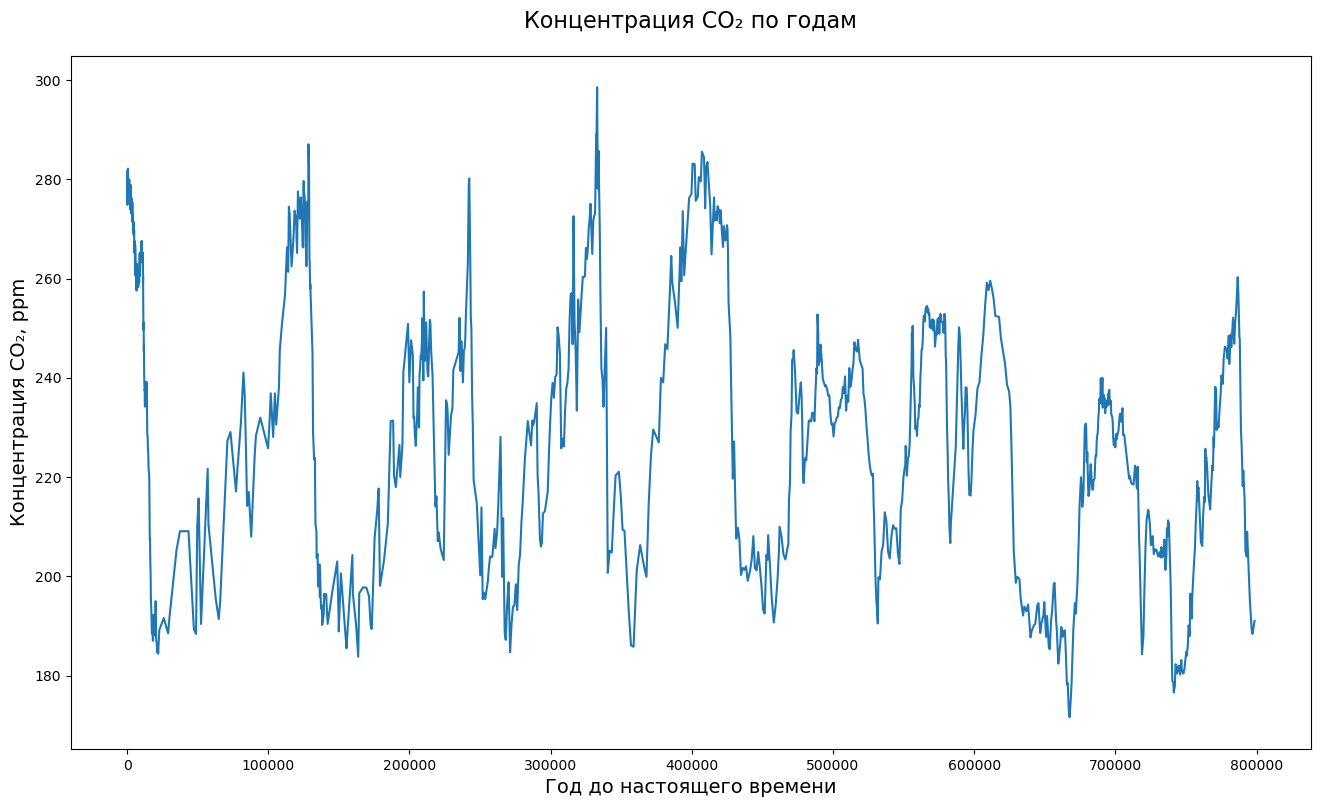

In [38]:
# Ваш код
plt.figure(figsize=(16,9)) 

year = co2[:, 0] 
concentr = co2[:, 1] 
plt.plot(year, concentr)
plt.xlabel('Год до настоящего времени', fontsize=14)
plt.ylabel('Концентрация CO₂, ppm', fontsize=14)
plt.title('Концентрация CO₂ по годам', fontsize=16, pad=20)

✅ **(0.025 балла)** используя график (не `max`), найдите максимум содержания за последние 800 тысяч лет.

✅ **(0.025 балла)** используя график, найдите то время, когда содержание CO$_2$ было максимальным. 

✅ **(0.05 балла)** используя `plt.xlim`, найдите его более точно.

(290.0, 300.0)

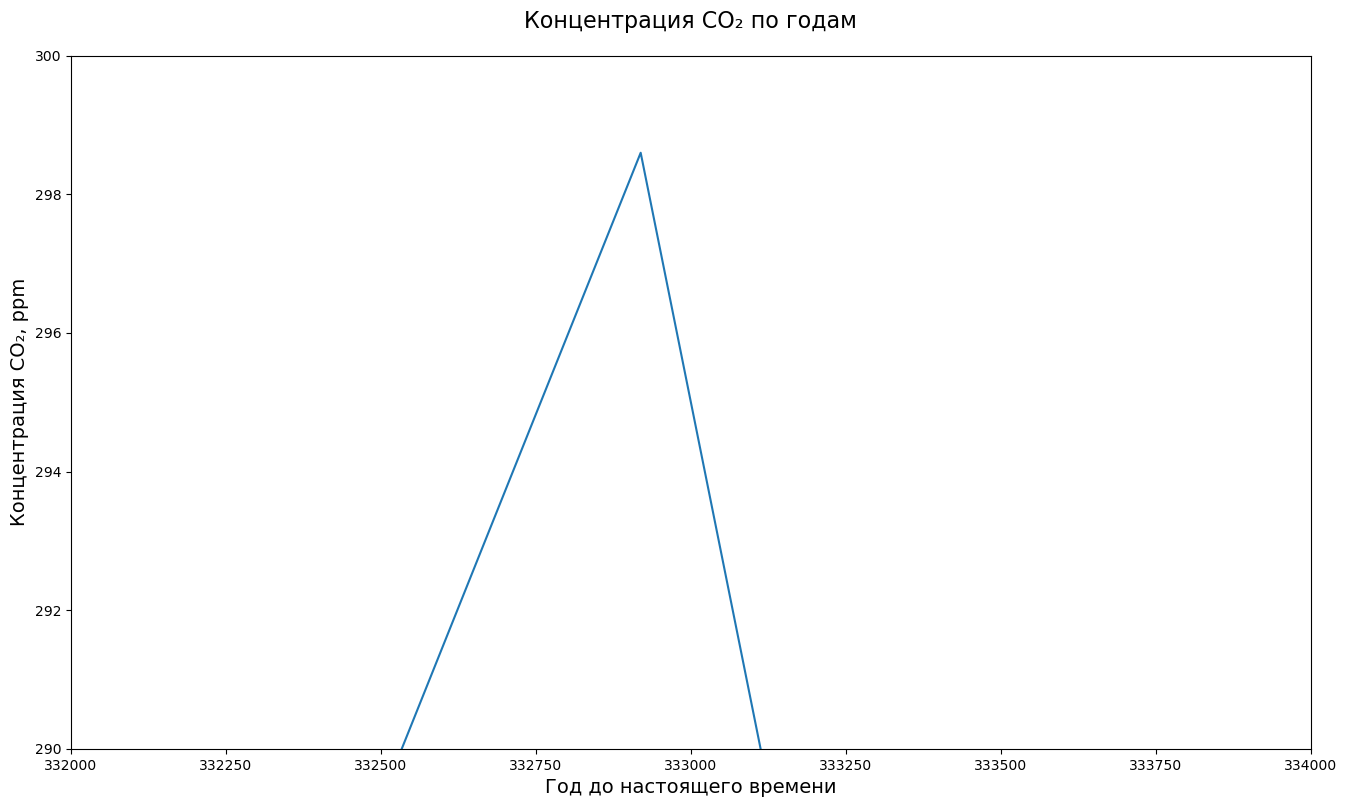

In [10]:
# Ваш код
# Визуально максимальное значение - 300 ppm, 330 000 лет назад. 
plt.figure(figsize=(16,9)) 

year = co2[:, 0] 
concentr = co2[:, 1] 
plt.plot(year, concentr)
plt.xlabel('Год до настоящего времени', fontsize=14)
plt.ylabel('Концентрация CO₂, ppm', fontsize=14)
plt.title('Концентрация CO₂ по годам', fontsize=16, pad=20)
plt.xlim([332000,334000])
plt.ylim([290,300])
#более точно: 298.3 и 332 750.

✅ ✨ **(0.2 балла)** используя данные (файл `data/co2_mlo.txt`) с обсерватории [Mauna Loa](https://en.wikipedia.org/wiki/Keeling_Curve), постройте на одном графике данные за 800 тысяч лет и данные с 1960-го года по содержанию CO$_2$ в атмосфере. 

<p>
<details>
<summary> <u> Подсказка </u> </summary>

В файле с данными ледяных кернов можно найти, что они были измерены в 2008-ом году. Если вычесть из 2008-го года первый стобец данных, то получится год, в котором это было измерено. Отрицательный год означает год до нашей эры.

</details>
</p>

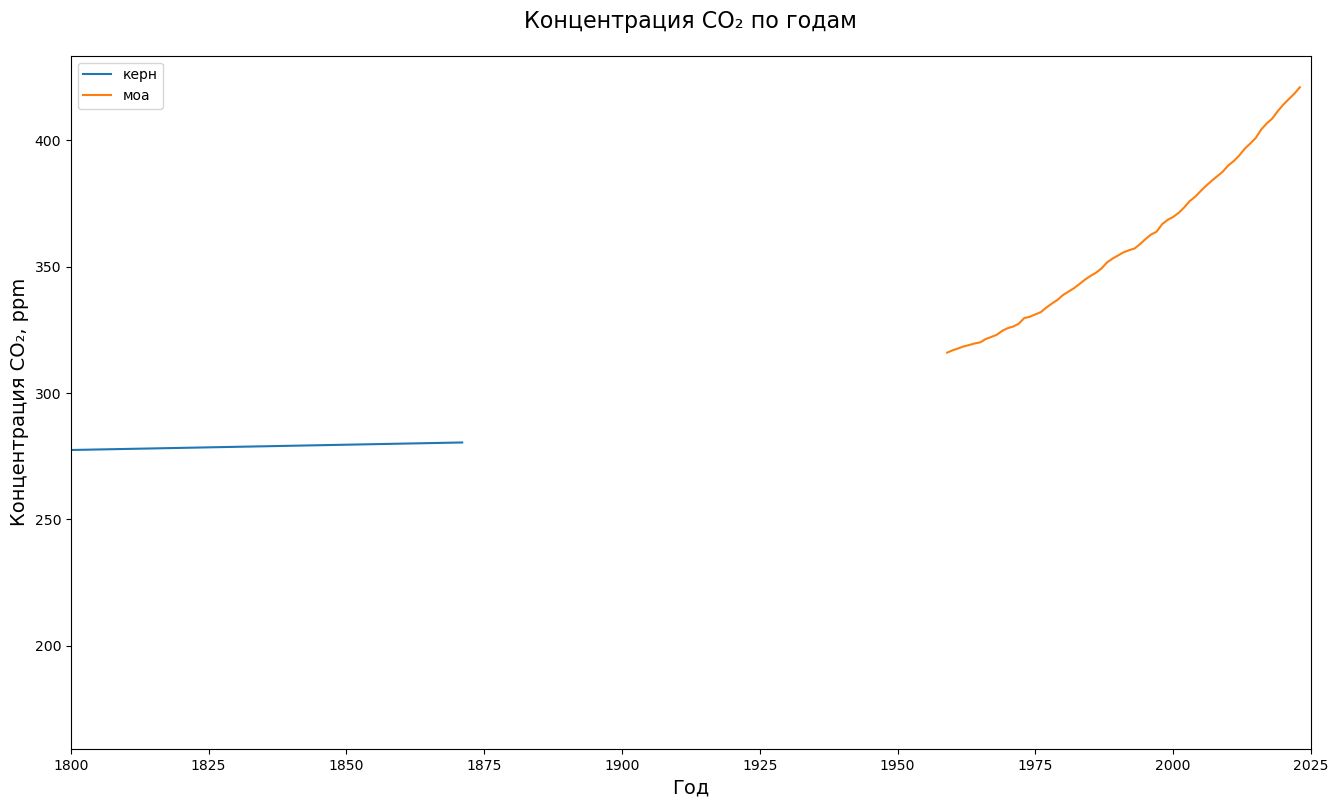

In [11]:
# Ваш код
import numpy as np 
co2_moa = np.loadtxt('data/co2_mlo.txt')
co2_moa

plt.figure(figsize=(16,9)) 

year_ice = 2008 - co2[:, 0]  
concentr_ice = co2[:, 1]

year_mlo = co2_moa[:, 0]
concentr_mlo = co2_moa[:, 1]

plt.plot(year_ice, concentr_ice)
plt.plot(year_mlo, concentr_mlo)

plt.xlim([1800, 2025])
plt.xlabel('Год', fontsize=14)
plt.ylabel('Концентрация CO₂, ppm', fontsize=14)
plt.title('Концентрация CO₂ по годам', fontsize=16, pad=20)
plt.legend(['керн', 'моа'], fontsize=10)

## Глобальное потепление :(

Выполните ячейку ниже:

In [12]:
import pickle
with open('data/sst_era5.pickle', 'rb') as handle:
    data_dict = pickle.load(handle)

C:\Users\student\AppData\Local\Temp\ipykernel_9716\1029277338.py:3: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data_dict = pickle.load(handle)


`data_dict` - словарь с данными реанализа [ERA5](https://doi.org/10.1002/qj.3803) средней температуры океана между 60 градусами южной широты и 60 градусами северной широты. Ключами в словаре явлются годы между `1979` и `2023`. Для каждого года в словарь с данными `time` и `sea_surface_temp` для каждого года:

In [13]:
data_dict.keys(), data_dict[1979]

(dict_keys([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]),
 {'time': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
         104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
         117, 118, 119, 120, 121, 122, 123

✅ **(0.05 балла)** Постройте график температуры за `1979` год. По оси `x` должно быть время в днях, по оси `y` температура в градусах Цельсия.

✅ **(0.05 балла)** Оформите график: подпишите оси, сделайте график нормального размера, и т.д.

Text(0.5, 1.0, 'Температура за 1979 год')

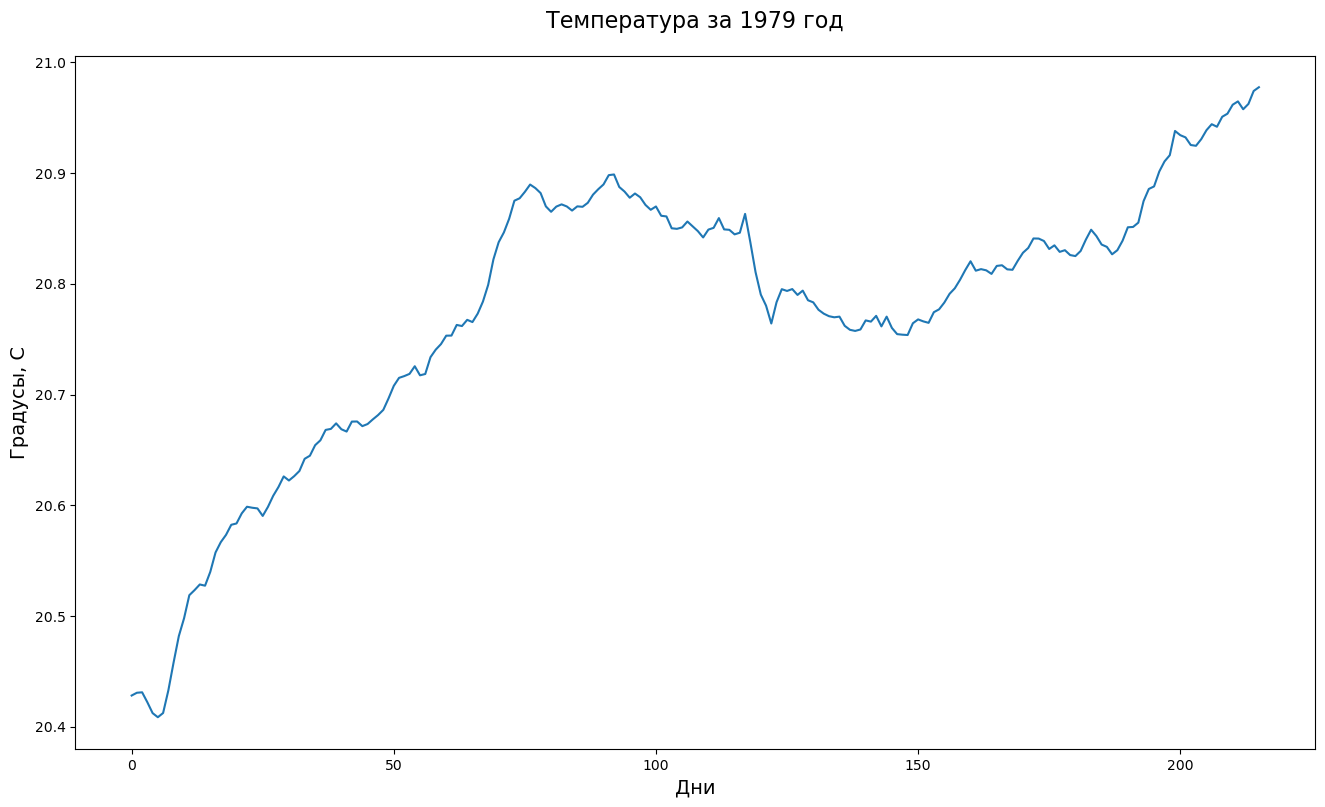

In [14]:
# Ваш код
data_dict.keys(), data_dict[1979]
plt.figure(figsize=(16,9)) 

years = list(data_dict.keys())

for year in years:
    year_data = data_dict[year]
    time = year_data['time']
    sea_surface_temp = year_data['sea_surface_temp']

plt.plot(time, sea_surface_temp)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('', fontsize=16, pad=20)

plt.xlabel('Дни', fontsize=14)
plt.ylabel('Градусы, C', fontsize=14)
plt.title('Температура за 1979 год', fontsize=16, pad=20)

✅ **(0.1 балл)** Постройте данные за все годы на **одном** графике. График за 2023-ый год постройте цветом `color='C1'`, графики за другие годы постройте черным цветом.

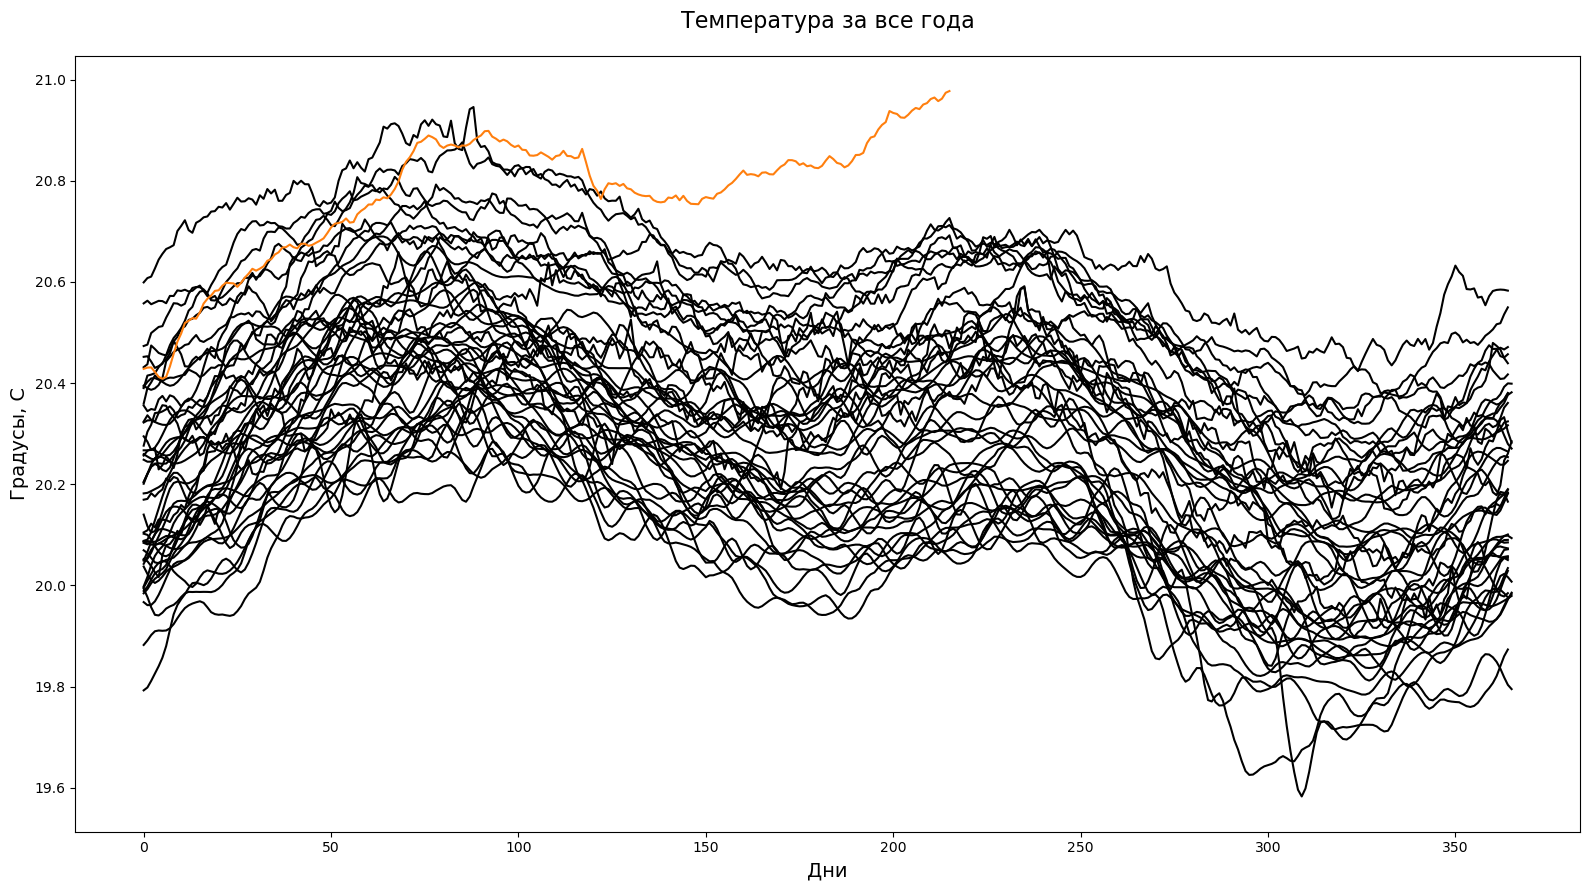

In [21]:
# Ваш код
data_dict.keys(), data_dict[1979]
plt.figure(figsize=(16,9)) 

years = list(data_dict.keys())

for year in years:
    year_data = data_dict[year]
    time = year_data['time']
    sea_surface_temp = year_data['sea_surface_temp']
    
    if year == 2023: 
        plt.plot(time, sea_surface_temp, color='C1')
    else:
        plt.plot(time, sea_surface_temp, color='black')

plt.xlabel('Дни', fontsize=14)
plt.ylabel('Градусы, C', fontsize=14)
plt.title('Температура за все года', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

**(0.1 балл)** Задайте параметр `alpha` таким образом, чтобы он линейно возрастал от нуля до единицы от `1979` до `2023`. График за `1979` должен быть построен с `alpha=0`, а за `2023` с `alpha=1`.

In [5]:
# Ваш код

**(0.1 балла)** Сделайте легенду на графике: в легенде должен быть только соответсующий год, подберите шрифт таким образом, чтобы она влезала на график. Параметр `ncols=` позволяет задавать легенду в несколько столбцов.

Примерный итоговый график можно посмотреть в `figures/sea_surface_temp.png`.

In [184]:
# Ваш код

## Не очень серьезное задание

В файле `data/lab.txt` находятся данные о росте количества попугаев в городе Барселона тысячах штук (второй столбец) от года (первый столбец). 

✅ **(0.05 балла)** Загрузите данные:

In [26]:
# Ваш код
lab = np.loadtxt('data/lab.txt')
lab

array([[2001.        ,    2.16208453],
       [2002.        ,    6.74005744],
       [2003.        ,   15.6374977 ],
       [2004.        ,   13.22734851],
       [2005.        ,   10.37713403],
       [2006.        ,   23.18736281],
       [2007.        ,   21.95334243],
       [2008.        ,   28.09658822],
       [2009.        ,   27.75057074],
       [2010.        ,   28.95480486],
       [2011.        ,   31.41494518],
       [2012.        ,   40.93231317],
       [2013.        ,   31.21169917],
       [2014.        ,   42.25622613],
       [2015.        ,   45.78164662]])

✅ **(0.1 балл)** Постройте график и оформите его. Данные нужно строить маркером `*`.

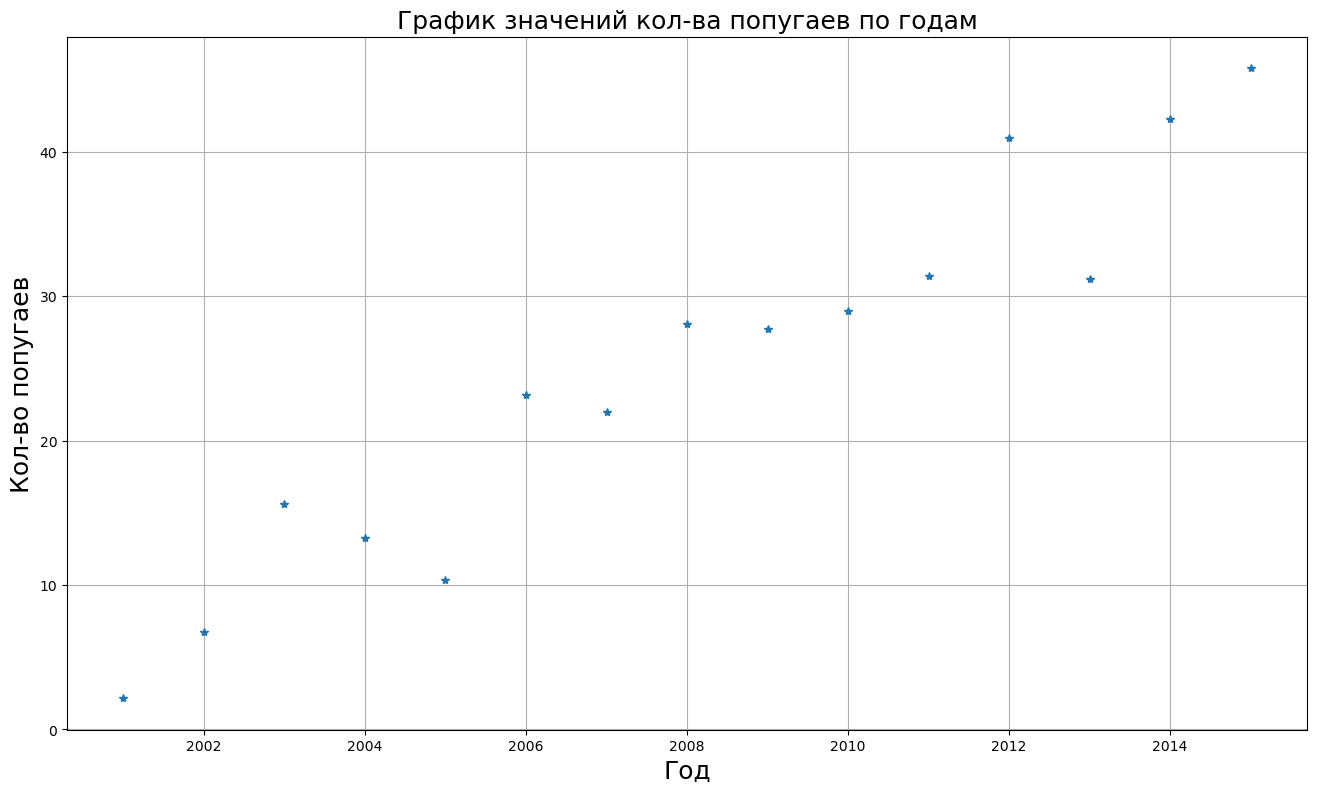

In [34]:
year = lab[:, 0]    
parrot = lab[:, 1]  

plt.figure(figsize=(16,9)) 

plt.plot(year, parrot, '*') 
plt.xlabel('Год', fontsize=18) 
plt.ylabel('Кол-во попугаев', fontsize=18) 
plt.title('График значений кол-ва попугаев по годам', fontsize=18)
plt.grid()

При линейной зависимости $y = kx + b$ коэффициенты линейной регрессии для аппроксимации наших данных прямой выглядят так:
$$
k = \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n}(x_i-\overline{x})^2}
$$
$$
b = \overline{y} - k\overline{x}
$$

**(0.15 балла)** Найдите коэффициенты линейной регрессии:

In [ ]:
# Ваш код

**(0.1 балл)** Постройте данные и полученную аппроксимацию на одном графике:

In [ ]:
# Ваш код

## ✨ Бог с ним с самым большым простым числом, но сколько же их все-таки...

**(0.2 балла)** Помните, мы находили все простые числа на отрезке? Постройте график зависимости количества простых чисел на отрезке `[1, n]` от `n`.

In [86]:
# Ваш код

**(0.1 балл)** Сравните его с графиком функции `n/ln(n)`.

In [ ]:
# Ваш код

## Какие-какие фигуры?...

✨ **(0.2 балла)** Постройте 4 разные [фигуры Лиссажу](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%B3%D1%83%D1%80%D1%8B_%D0%9B%D0%B8%D1%81%D1%81%D0%B0%D0%B6%D1%83).

In [ ]:
# Ваш код